In [1]:
# Import Pandas
import pandas as pd
# import seaborn and matplotlib.pyplot for visualization
import seaborn as sns
import matplotlib.pyplot as plt
# import statsmodel for linear regression modeling
import statsmodels.api as sms
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_pickle('./preprocessed_df.pkl')

## Visualization of the dataset

### Goal:
The goal is to help choose the best features as input for the model.

## Correlation Heatmap:


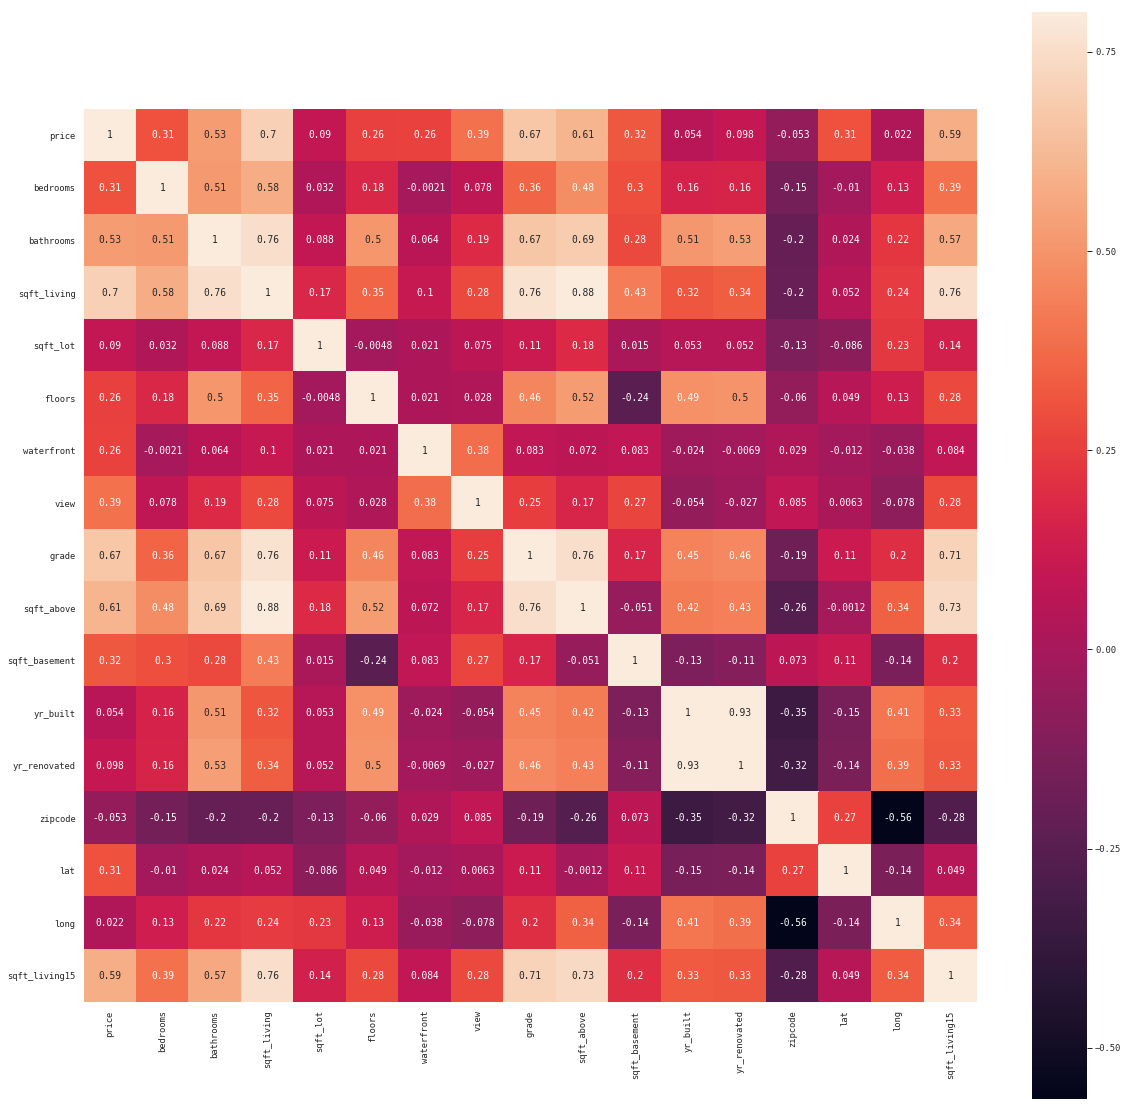

In [3]:
df_corr = df.iloc[:,:18]
sns.set(context="paper", font="monospace")
corrmat = df_corr.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
# # Drawing the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

Correlation Heatmap points to a number of interessting or important features:
    - bathrooms
    - sqft_living
    - sqft_above
    - sqft_living_15
    - view 
    - sqft_basement
    - grade - (only as continuous variable)

### Scatter matrix:

/Users/gabriel/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


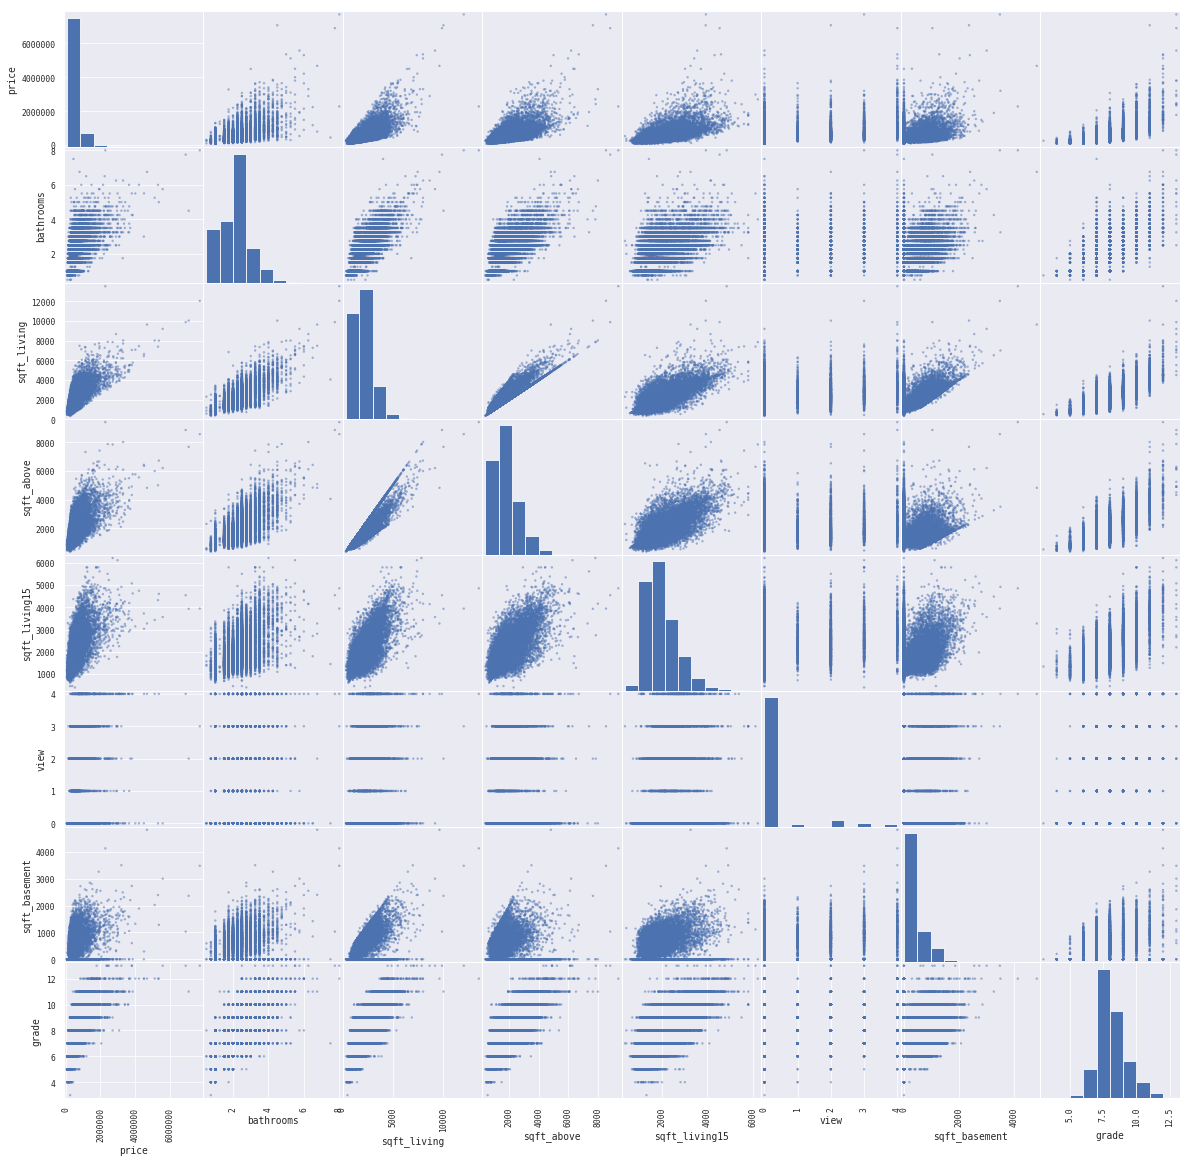

In [4]:
pd.scatter_matrix(df[['price', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15', 'view', 'sqft_basement','grade']], 
                  figsize=(20,20), 
                  edgecolor='none', 
                  alpha=0.5);

The impression from the heatmap is supported by the scatter matrix. All features except view show strong linear correlation with the price. 

## Investigate features statistical significance with a simple linear regression:

Here a number of simple linear regressions between the price and each of the features is calculated.
### Goal:
The goal is also to pick the best features for our future model. 


In [5]:
r2_list =[]
for col in df.columns[1:]:
    if col != 'price':
        x = df[col]
        x = sms.add_constant(x)
        y = df['price']
        model = sms.OLS(y, x)
        result = model.fit()
        r2_list.append(result.rsquared)
        print('The R2 - Value for a SLG with %s and price = %.4f' %(col, result.rsquared))
print('Best r2-value = %.4f' % max(r2_list))

The R2 - Value for a SLG with bedrooms and price = 0.0953
The R2 - Value for a SLG with bathrooms and price = 0.2766
The R2 - Value for a SLG with sqft_living and price = 0.4927
The R2 - Value for a SLG with sqft_lot and price = 0.0081
The R2 - Value for a SLG with floors and price = 0.0659
The R2 - Value for a SLG with waterfront and price = 0.0699
The R2 - Value for a SLG with view and price = 0.1548
The R2 - Value for a SLG with grade and price = 0.4462
The R2 - Value for a SLG with sqft_above and price = 0.3665
The R2 - Value for a SLG with sqft_basement and price = 0.1031
The R2 - Value for a SLG with yr_built and price = 0.0029
The R2 - Value for a SLG with yr_renovated and price = 0.0095
The R2 - Value for a SLG with zipcode and price = 0.0029
The R2 - Value for a SLG with lat and price = 0.0941
The R2 - Value for a SLG with long and price = 0.0005
The R2 - Value for a SLG with sqft_living15 and price = 0.3425
The R2 - Value for a SLG with sqft_lot15 and price = 0.0069
The R2 - 

In [6]:
# Investingate condtion feature all dummies together:
x = df[['con__2', 'con__3', 'con__4', 'con__5']]
x = sms.add_constant(x)
y = df['price']
model = sms.OLS(y, x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     36.86
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           9.12e-31
Time:                        00:27:04   Log-Likelihood:            -3.0732e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21592   BIC:                         6.147e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.411e+05    6.8e+04      5.016      0.000    2.08e+05    4.74e+05
con__2     -1.289e+04   7.36e+04     -0.175      0.861   -1.57e+05    1.31e+05
con__3      2.011e+05   6.81e+04      2.955      0.003    6.77e+04    3.35e+05
con__4      1.803e+05   6.82e+04      2.645      0.008    4.67e+04    3.14e+05
con__5      2.715e+05   6.86e+04      3.960      0.000    1.37e+05    4.06e+05
==============================================================================
Omnibus:                    19184.771   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1160794.218
Skew:                           4.043   Prob(JB):                         0.00
Kurtosis:                      37.994   Cond. No.                         75.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Investingate grade feature all dummies together:
#x = df[['grade_4','grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       #'grade_11', 'grade_12', 'grade_13']]
x = df[['grade']]
x = sms.add_constant(x)
y = df['price']
model = sms.OLS(y, x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:27:04   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The grade feature combined show an interessing significance. Using only the grade feature as dummi variables show an r2 value of .5 . Still the p value for many grades is pretty high. 

## Creating a multiple linear regression with the best features:


### Scaling the dataset with standard scaler

In [13]:
df_in = df[['grade','bathrooms', 'sqft_living', 'view', 'sqft_above', 'sqft_living15']]
#df_in = df.drop(columns=['price'])
scaled_bool = False

In [9]:
# Standard Scaler
scaled_features = StandardScaler().fit_transform(df_in.values)
#scaled_features[:3,:] #lost the indices
scaled_features.shape
scaled_goal = StandardScaler().fit_transform(df['price'].values.reshape(-1, 1))
#scaled_goal.shape

In [10]:
# MinMaxScaler
scaled_features = MinMaxScaler().fit_transform(df_in.values)
scaled_goal = MinMaxScaler().fit_transform(df['price'].values.reshape(-1, 1))

In [14]:
if scaled_bool:
    x = scaled_features
    x = sms.add_constant(x)
    y = scaled_goal
else:
    cols = df_in.columns
    x = df_in[cols]
    y = df['price']
model = sms.OLS(y, x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 2.101e+04
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:27:59   Log-Likelihood:            -2.9906e+05
No. Observations:               21597   AIC:                         5.981e+05
Df Residuals:                   21591   BIC:                         5.982e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
grade          9424.4988   1077.786      8.744      0.000    7311.959    1.15e+04
bathrooms     -2.951e+04   3469.632     -8.505      0.000   -3.63e+04   -2.27e+04
sqft_living     237.1239      4.614     51.396      0.000     228.081     246.167
view           1.046e+05   2366.730     44.207      0.000       1e+05    1.09e+05
sqft_above        2.5871      4.467      0.579      0.563      -6.169      11.343
sqft_living15     8.5923      4.091      2.100      0.036       0.574      16.610
==============================================================================
Omnibus:                    16188.670   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           840936.185
Skew:                           3.111   Prob(JB):                         0.00
Kurtosis:                      32.930   Cond. No.                     7.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Summary of OLG fitting:

The best-slim dataset with the 5 features with the highest correlation score the best in the multi linear regression. Scaling is not improving the r2 value - neather standard scaler nor minmaxscaler.
The best result for linear regression has a r2 value of __0.854__

# For business cases see Part 3!